In [68]:
# !pip install bs4
# !pip install requests
# !pip install pandas
# !pip install wordcloud
#! pip install seaborn

import sys
from os import path
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud, STOPWORDS
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns


# Hillary Clinton

In [69]:
url = "https://wikileaks.org/clinton-emails/?q=%28favor+%26+confidential%29+%7C+%28favor+%26+classified%29&mfrom=&mto=&title=&notitle=&date_from=&date_to=&nofrom=&noto=&count=200&sort=0&page=1&#searchresult"
r = requests.get(url)
soup = bs(r.content, 'html.parser')

### Locate and Create Table of Target Emails

In [70]:
table = soup.find("table",  class_='table table-striped search-result')
tab_rows = table.find_all('tr')

In [71]:
l = []
for tr in tab_rows:
    td = tr.find_all('td')
    row = tr.get_text().strip() 
    l.append(row)

### Turn Table into Data Frame

In [72]:
df = pd.DataFrame(l)
df[['DocID', 'Date', 'Subject', 'From', 'To']] = df[0].str.split('\n', expand=True)
df = df.iloc[1:,1:]

### Create Giant Text List for HRC

In [73]:
url1 = 'https://wikileaks.org/clinton-emails/emailid/'

li = []
for i in df.iloc[1:80,0]:
    one = url1 + i
    one1 = requests.get(one)
    two = bs(one1.content, 'html.parser')
    three = two.find(id='uniquer')
    four = three.get_text().strip()
    li.append(four)

### Create Giant Text List for 1984

In [89]:
url2 = 'http://www.george-orwell.org/1984/'

story = []
for i in range(22,23):
    myurl = url2 + str(i) + '.html'
    s = requests.get(myurl)
    ch = bs(s.content, 'html.parser')
    six = [sib.get_text() for sib in ch.find('h2').next_siblings]
    story.append(six)


In [90]:
eight = [str(i).split() for i in story]
nine = []
for phrase in eight:
    for word in phrase:
        nine.append(word)


### Create Word Usage Data Frame for 1984

In [91]:
words2 = [ str(w).lower().strip() for w in nine ]
table = str.maketrans(dict.fromkeys(string.punctuation))
words1 = [i.translate(table) for i in nine]

In [92]:
freq1 = [words1.count(w) for w in words1]
sev = dict(list(zip(words1, freq1)))

In [93]:
usage1 = pd.DataFrame(list(sev.items()),columns=['Word', 'Count'])
usage1.sort_values(by='Count', ascending=False, inplace=True)


### Create Word Usage Data Frame for HRC

In [94]:
wordlist = list(re.sub('[' + string.punctuation + ']', '', four).lower().split())   
freq = [wordlist.count(w) for w in wordlist]
five = dict(list(zip(wordlist, freq)))

In [95]:
usage = pd.DataFrame(list(five.items()),columns=['Word', 'Count'])
usage.sort_values(by='Count', ascending=False, inplace=True)



### STOPWORDS and Other Filters

In [96]:
stopwords = []
stopwords = list(set(STOPWORDS))
stopwords += ['>','from:','to:', 'no.', 'date:','sent:','subject:', 're:',
             'original', 'message', 'cameron', 'robinson', 'shaun',
             'c05774510', '11302015', 'f201420439', "o\\'brien"]

In [97]:
filt = (usage.Word.isin(stopwords))
filt1 = (usage1.Word.isin(stopwords))
unique = usage[~filt]
unique1 = usage1[~filt1]
length = [len(w) for w in unique.Word]
length1 = [len(w) for w in unique1.Word]
unique.insert(2, 'Length', length, True)
unique1.insert(2, 'Length', length1, True)
filt2 = (unique['Length'] > 4)
filt3 = (unique1['Length'] > 4)
#---------------------------------------------------
usage2 = usage.sort_values(by='Count', ascending=True)
usage3 = usage1.sort_values(by='Count', ascending=True)
filt6 = (usage2.Word.isin(stopwords))
filt7 = (usage3.Word.isin(stopwords))
unique2 = usage2[~filt6]
unique3 = usage3[~filt7]

length2 = [len(w) for w in unique2.Word]
length3 = [len(w) for w in unique3.Word]
unique2.insert(2, 'Length', length, True)
unique3.insert(2, 'Length', length1, True)
filt4 = (unique2['Length'] > 4)
filt5 = (unique3['Length'] > 4)

In [98]:
a=unique[filt2].iloc[1:11,0:2]
b=unique1[filt3].iloc[1:11,0:2]
#--------------
c=unique2[filt4].iloc[1:11,0:2]
d=unique3[filt5].iloc[1:11,0:2]

hrc_lst = unique[filt2]
_1984_lst = unique1[filt3]

mydict = {
    'HRC'  : [len(hrc_lst['Word'])],
    '1984' : [len(_1984_lst['Word'])]}

df2 = pd.DataFrame(mydict, index=['words'])
df2

,HRC,1984
words,282,839


Text(0.5, 1.0, '1984 Pt. 2/3')

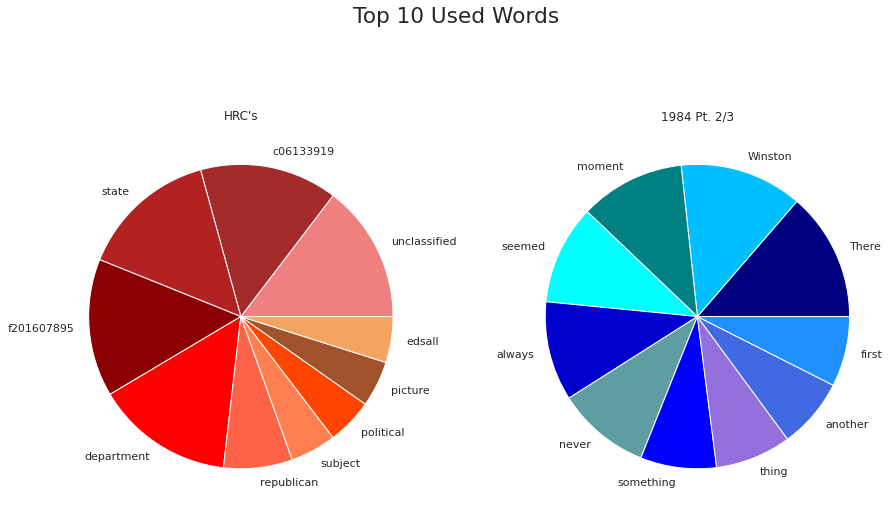

In [84]:
colors = ['lightcoral', 'brown', 'firebrick', 'darkred', 'red', 'tomato', 'coral', 'orangered','sienna','sandybrown']
colors1 = ['navy', 'deepskyblue', 'teal','aqua', 'mediumblue', 'cadetblue', 'blue', 'mediumpurple', 'royalblue', 'dodgerblue']

fig, axs = plt.subplots(1,2, figsize=(15,9))
plt.rcParams.update({'font.size' : 18})
fig.suptitle('Top 10 Used Words')
axs[0].pie(a['Count'], labels=a['Word'], colors=colors)
#axs[1].pie(1:2)
axs[1].pie(b['Count'], labels=b['Word'], colors=colors1)
axs[0].set_title("HRC's")
axs[1].set_title("1984 Pt. 2/3")
#plt.tight_layout()


Text(0.5, 1.0, '1984 Pt. 2/3')

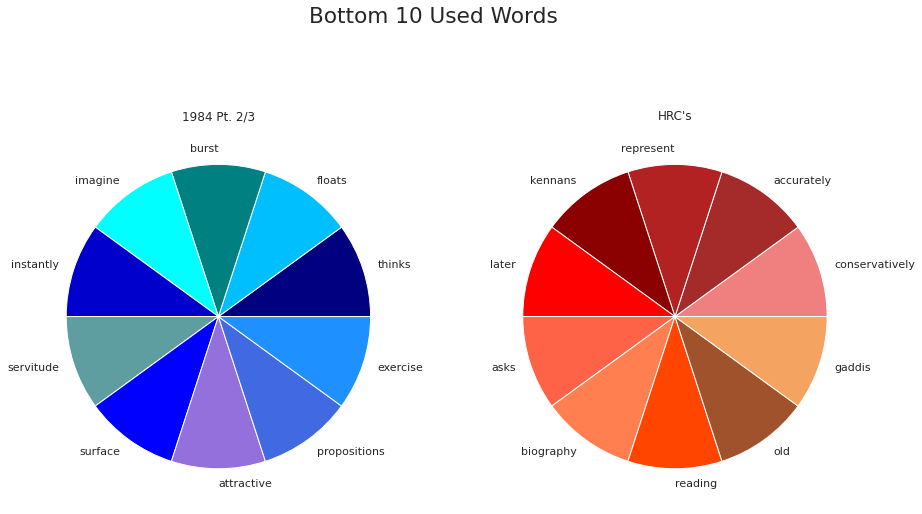

In [85]:
colors = ['lightcoral', 'brown', 'firebrick', 'darkred', 'red', 'tomato', 'coral', 'orangered','sienna','sandybrown']
colors1 = ['navy', 'deepskyblue', 'teal','aqua', 'mediumblue', 'cadetblue', 'blue', 'mediumpurple', 'royalblue', 'dodgerblue']

fig, axs = plt.subplots(1,2, figsize=(15,9))
plt.rcParams.update({'font.size' : 18})
fig.suptitle('Bottom 10 Used Words')
axs[1].pie(c['Count'], labels=c['Word'], colors=colors)
#axs[1].pie(1:2)
axs[0].pie(d['Count'], labels=d['Word'], colors=colors1)
axs[1].set_title("HRC's")
axs[0].set_title("1984 Pt. 2/3")
#plt.tight_layout()

In [3]:
ee = unique[filt2].iloc[1:101,0:3]
ee['Type'] = np.repeat('HRC',100)
ff = unique1[filt3].iloc[1:101,0:3]
ff['Type'] = np.repeat(1984, 100)

f = random.sample([np.arange(0,len(ee['Word']), step=1)], len(ee['Word']))

# hrc = e['Word'].to_string()
# _1984 = f['Word'].to_string()

# # hrc = [word for word in e['Word']].to_string()
# # _1984 = [word for word in f['Word1']]

# wordcloud = WordCloud(max_font_size = 80, background_color = 'white',
#                      collocations = True, colormap='magma').generate(hrc)
# plt.figure()
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.suptitle("HRC's Diction")

# wordcloud1 = WordCloud(max_font_size = 80, background_color = "white", 
#                       collocations = True, colormap = "ocean").generate(_1984)
# plt.figure()
# plt.imshow(wordcloud1)
# plt.axis("off")
# plt.suptitle("1984's Diction")
# plt.show()



NameError: name 'unique' is not defined

Text(0.5, 0.98, 'How Often Was Each Word Used?')

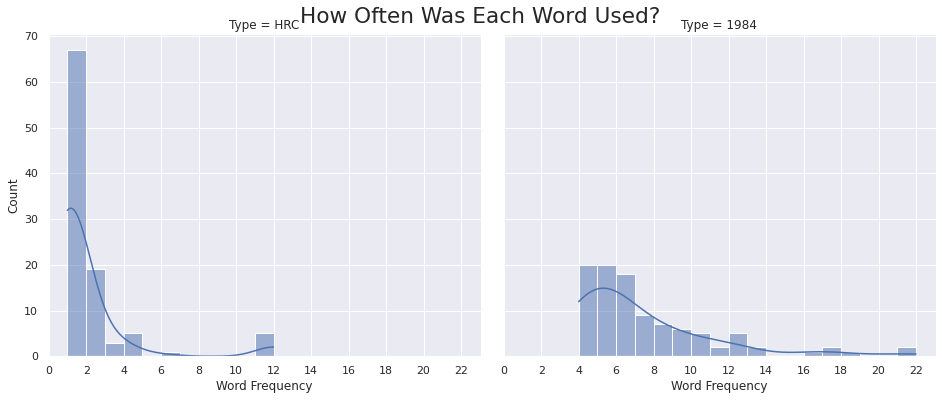

In [87]:
g = e.append(f, ignore_index=True)
fac = sns.FacetGrid(g, col='Type', height=5.5, aspect=1.2)
fac.map_dataframe(sns.histplot, x='Count', kde=True, binwidth=1)
fac.set_axis_labels('Word Frequency', 'Count')
fac.set(xticks=[x for x in np.arange(start=0, stop=24, step=2)])
fac.fig.suptitle('How Often Was Each Word Used?')

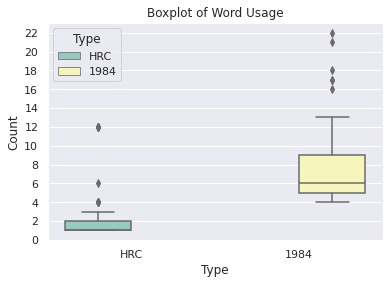

In [88]:
sns.set_theme(style='darkgrid')
box = sns.boxplot(x='Type', y='Count', data=g, hue='Type', 
                  palette='Set3').set_title('Boxplot of Word Usage')
plt.yticks(np.arange(start=0, stop=24, step=2))
plt.show()